In [9]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import  MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [15]:
df = web.DataReader('AAPL', data_source='yahoo', start='2010-01-01', end='2020-12-17')
#show
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.583586
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.594968
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.490066
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.478067
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.521136
...,...,...,...,...,...,...
2020-12-11,122.760002,120.550003,122.430000,122.410004,86939800.0,122.227356
2020-12-14,123.349998,121.540001,122.599998,121.779999,79184500.0,121.598289
2020-12-15,127.900002,124.129997,124.339996,127.879997,157572300.0,127.689186


# Above you can change the stock you wanna see and run all below again

In [16]:
#number of rows /
df.shape

(2760, 6)

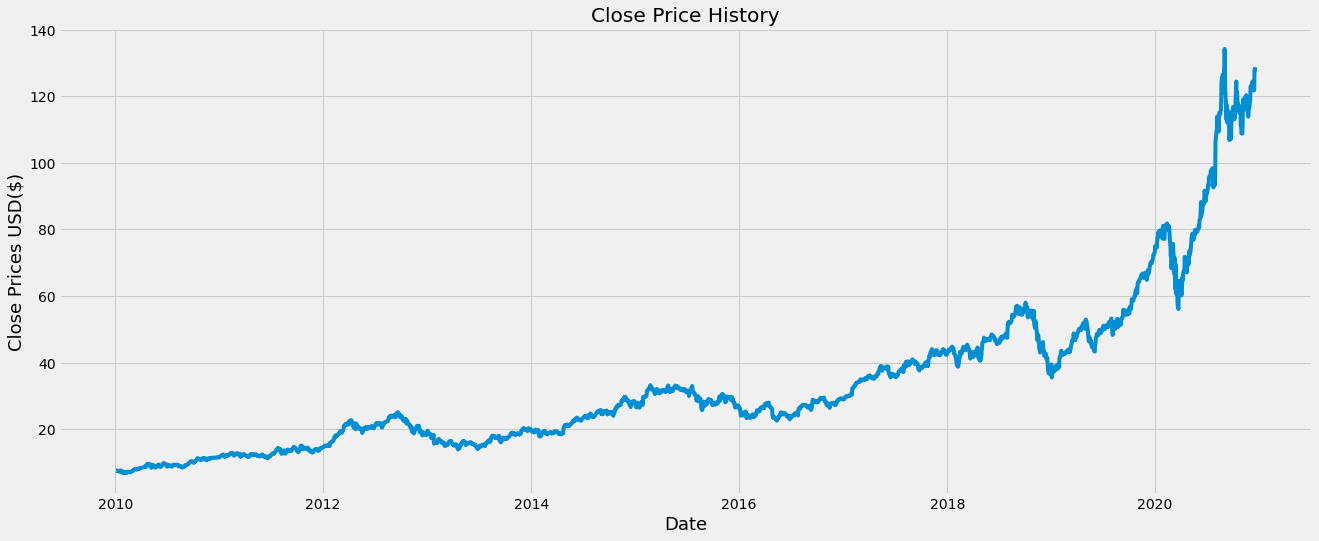

In [19]:
#V closing price
plt.figure(figsize=(20,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Prices USD($)', fontsize=18)
plt.show()

In [20]:
#new data frame
data = df.filter(['Close'])
#convert dataframe to numpy
dataset = data.values
#number of rows
training_data_len = math.ceil(len(dataset) * .8 )
training_data_len

2208

In [21]:
#scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0061599 ],
       [0.00626369],
       [0.00530717],
       ...,
       [0.95051883],
       [0.94996904],
       [0.95695924]])

In [23]:
#create training dataset
#scaled training
train_data = scaled_data[0:training_data_len, :]
#split data
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([6.15990039e-03, 6.26368988e-03, 5.30716597e-03, 5.19776250e-03,
       5.59047199e-03, 5.06593303e-03, 4.39551652e-03, 5.21739835e-03,
       4.87518478e-03, 3.89341478e-03, 6.44882039e-03, 5.52035145e-03,
       4.49369202e-03, 1.59887796e-03, 3.09116881e-03, 3.89621990e-03,
       4.44040221e-03, 2.03085541e-03, 2.80137618e-06, 7.51750046e-04,
       1.06872127e-03, 2.01402469e-03, 0.00000000e+00, 9.56516414e-04,
       5.80641390e-04, 1.16129027e-03, 8.61146033e-04, 1.85694164e-03,
       2.33660989e-03, 3.18373781e-03, 2.94530999e-03, 3.05189711e-03,
       2.69845931e-03, 2.34782663e-03, 1.40532834e-03, 2.41515329e-03,
       2.79102831e-03, 3.52595138e-03, 4.75176693e-03, 4.71249523e-03,
       4.84712982e-03, 5.23422907e-03, 7.54560037e-03, 7.58206694e-03,
       8.68725853e-03, 9.19777563e-03, 9.38290615e-03, 9.69146950e-03,
       8.91727474e-03, 9.08837965e-03, 8.99581439e-03, 9.14448207e-03,
       8.47126793e-03, 9.17253329e-03, 1.01851559e-02, 1.04684694e-02,
     

In [24]:
#conver x-y to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [26]:
#reshape x train needs to be 3d
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(2148, 60, 1)

In [27]:
#building model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [28]:
#compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2148/2148 [==============================] - 49s 22ms/step - loss: 2.9795e-04


In [30]:
#create the testing data set
#create new array containing scaled values from index 
test_data = scaled_data[training_data_len - 60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [31]:
#convert data to a numpy array
x_test = np.array(x_test)

In [32]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [33]:
#get model prediction 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [34]:
#get the root mean squared error
rmse = np.sqrt( np.mean(predictions - y_test)**2 )
rmse

0.5607700624327728

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


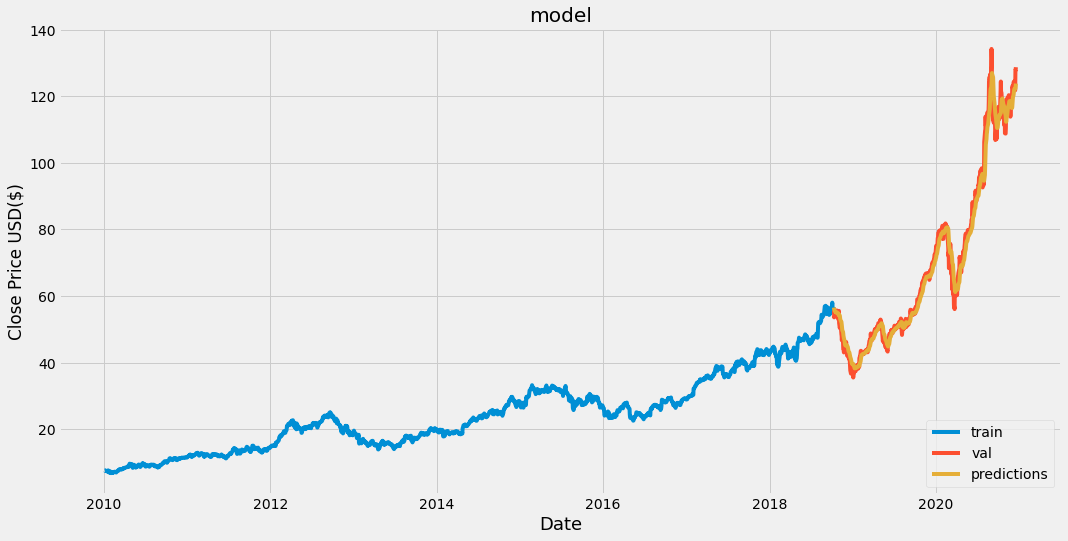

In [37]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#visual
plt.figure(figsize=(16, 8));
plt.title('model');
plt.xlabel('Date', fontsize=18);
plt.ylabel('Close Price USD($)');
plt.plot(train['Close']);
plt.plot(valid[['Close', 'predictions']]);
plt.legend(['train', 'val', 'predictions'], loc='lower right');
plt.show();

In [38]:
#show valid and predicted price
valid

,Close,predictions
Date,,
2018-10-10,54.090000,56.559525
2018-10-11,53.612499,56.226944
2018-10-12,55.527500,55.753136
2018-10-15,54.340000,55.524578
2018-10-16,55.537498,55.281525
...,...,...
2020-12-11,122.410004,122.259445
2020-12-14,121.779999,122.322243
2020-12-15,127.879997,122.232964


In [39]:
#get the qoute
apple_qoute = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#creat new dataframe
new_df = apple_qoute.filter(['Close'])
#60 days convert to array
last_60_days = new_df[-60:].values
#scale data between values 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#empty list
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data to a numpy array
X_test = np.array(X_test)
#reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scale price
pred_price = model.predict(X_test)
#undo
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[68.22021]]


In [40]:
apple_qoute2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_qoute2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
